In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("hate.csv",encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,comment,label
0,1,dalits are lowlives,N
1,2,gay people are a burden to our society,N
2,3,Arabs are not welcome,N
3,4,I'm not saying we should actually eliminate he...,N
4,5,bananas are for black people,N


In [4]:
df.shape

(41144, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  41144 non-null  int64 
 1   comment     41144 non-null  object
 2   label       41144 non-null  object
dtypes: int64(1), object(2)
memory usage: 964.4+ KB


# DATA CLEANING --->>

In [6]:
#drop  column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,comment,label
0,dalits are lowlives,N
1,gay people are a burden to our society,N
2,Arabs are not welcome,N
3,I'm not saying we should actually eliminate he...,N
4,bananas are for black people,N


In [8]:
# check missing value
df.isnull().sum()

comment    0
label      0
dtype: int64

In [9]:
#to check for duplicate values
df.duplicated().sum()

10

In [10]:
# remove duplicate value 
df=df.drop_duplicates(keep='first')

In [11]:
#again check for duplicate
df.duplicated().sum()

0

# EDA  --->>

In [12]:
df['label'].value_counts()

label
N    22151
P    18947
O       36
Name: count, dtype: int64

    Here we can see the difference between the n, p  and o  , so "o" is most imbalanced data and we can't down sample or oversample the data because it is too low so we will remove the o. first we will encode the data 
    

In [13]:
custom_mapping = {'N': 0, 'P': 1, 'O': 2}  # Custom numerical values for each label

# Apply custom mapping to label column
df['label'] = df['label'].map(custom_mapping)

In [14]:
df.head()

,comment,label
0,dalits are lowlives,0
1,gay people are a burden to our society,0
2,Arabs are not welcome,0
3,I'm not saying we should actually eliminate he...,0
4,bananas are for black people,0


    # N = 0, P = 1, O = 2

In [15]:
df['label'].value_counts()

label
0    22151
1    18947
2       36
Name: count, dtype: int64

In [16]:
df = df[df['label'] != 2]

In [17]:
df['label'].value_counts()

label
0    22151
1    18947
Name: count, dtype: int64

# Pie Chart --->>

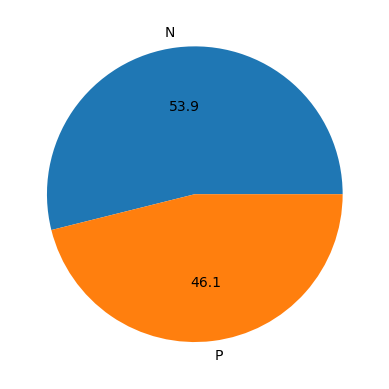

In [18]:
plt.pie(df['label'].value_counts(),autopct="%0.1f",labels=['N','P'])
plt.show()

<Axes: xlabel='label'>

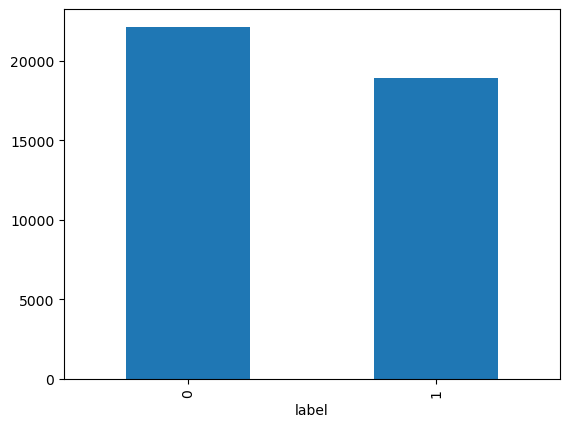

In [19]:
df['label'].value_counts().plot(kind='bar')

In [20]:
import nltk
#some dependencies are there to use nltk library that is 'punkt' ('Punkt' Sentence Tokenizer. This tokenizer divides a text into a list of sentences)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# NUmber of character in sentence without space --->>

In [21]:
df['num_character'] = df['comment'].apply(lambda x: len(x.replace(" ", "")))

# Number of sentence in each row --->>

In [22]:
df['num_sent'] = df['comment'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Number of words in each sentence ----->>

In [23]:
df['num_word'] = df['comment'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df

,comment,label,num_character,num_sent,num_word
0,dalits are lowlives,0,17,1,3
1,gay people are a burden to our society,0,31,1,8
2,Arabs are not welcome,0,18,1,4
3,I'm not saying we should actually eliminate he...,0,79,2,17
4,bananas are for black people,0,24,1,5
...,...,...,...,...,...
41139,Indian culture is so backwards,0,26,1,5
41140,"Women don't want equality, they just want to b...",0,47,1,13
41141,fuck covid,1,9,1,2
41142,This computer is garbage,1,21,1,4


<Axes: xlabel='num_character', ylabel='Count'>

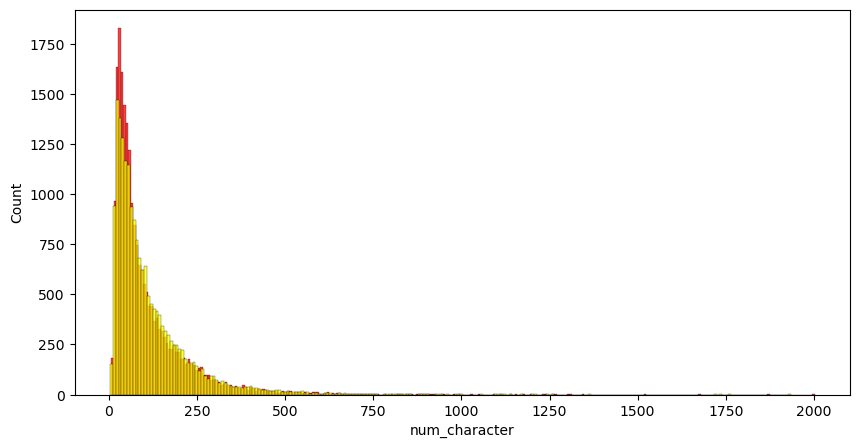

In [25]:
#now plot Histogram for P and N Msg based on num_character

plt.figure(figsize=(10,5))
sns.histplot()
sns.histplot(df[df['label']==0]['num_character'],color='red')
sns.histplot(df[df['label']==1]['num_character'],color='yellow')

<Axes: xlabel='num_word', ylabel='Count'>

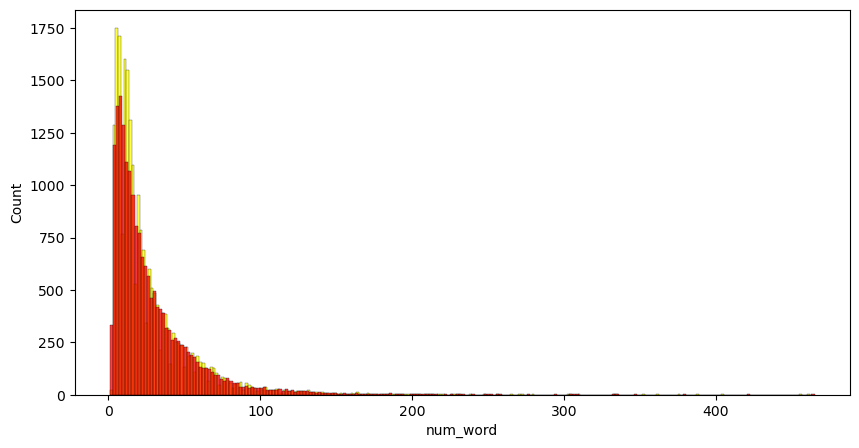

In [26]:
#now plot Histogram for P and N Msg based on num_words
plt.figure(figsize=(10,5))
sns.histplot()
sns.histplot(df[df['label']==0]['num_word'],color='yellow')
sns.histplot(df[df['label']==1]['num_word'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

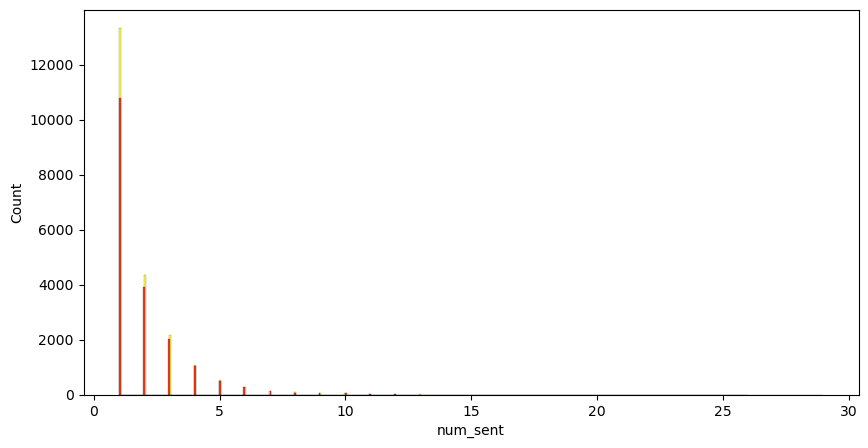

In [27]:
#now plot Histogram  based on num_sent
plt.figure(figsize=(10,5))
sns.histplot(df[df['label']==0]['num_sent'],color='yellow')
sns.histplot(df[df['label']==1]['num_sent'],color='red')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

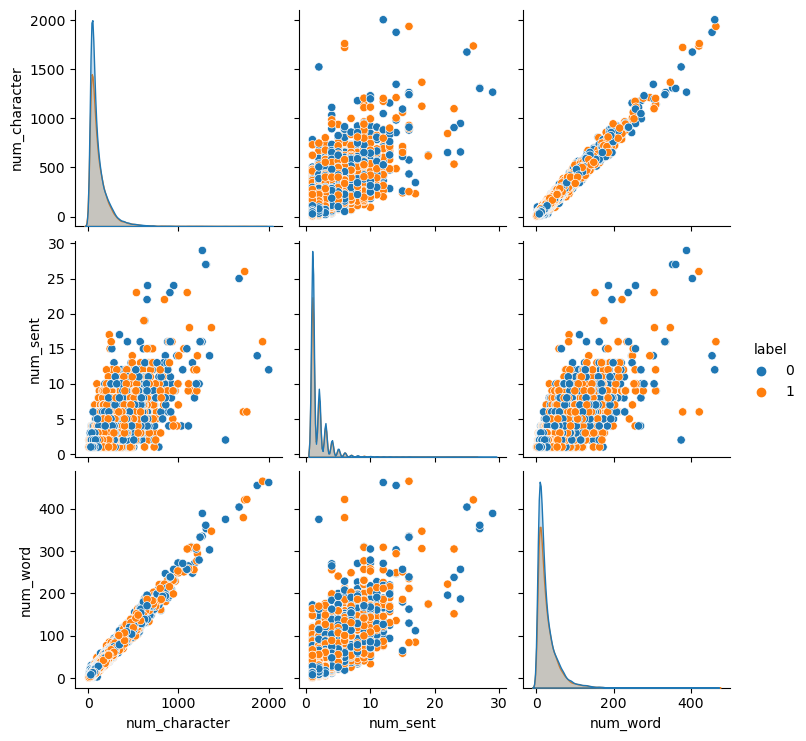

In [28]:
# now Check how this three columns are related with each other
plt.figure(figsize=(10,5))
sns.pairplot(df,hue='label')

<Axes: >

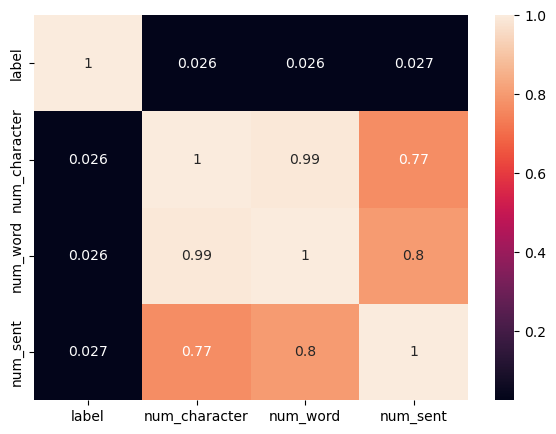

In [29]:
#find coorelation between the data
plt.figure(figsize=(7,5))
sns.heatmap(df[['label','num_character','num_word','num_sent']].corr(),annot=True)

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def text_transform(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize text
    
    # Remove special characters, stopwords, and perform stemming
    processed_tokens = [ps.stem(token) for token in tokens if token.isalnum() and token not in stop_words and token not in string.punctuation]
    
    return " ".join(processed_tokens)

In [35]:
df['comment_transformed']= df['comment'].apply(text_transform)

In [36]:
df

,comment,label,num_character,num_sent,num_word,comment_transformed
0,dalits are lowlives,0,17,1,3,dalit lowliv
1,gay people are a burden to our society,0,31,1,8,gay peopl burden societi
2,Arabs are not welcome,0,18,1,4,arab welcom
3,I'm not saying we should actually eliminate he...,0,79,2,17,say actual elimin heeb wish natur becam extinct
4,bananas are for black people,0,24,1,5,banana black peopl
...,...,...,...,...,...,...
41139,Indian culture is so backwards,0,26,1,5,indian cultur backward
41140,"Women don't want equality, they just want to b...",0,47,1,13,women want equal want charg
41141,fuck covid,1,9,1,2,fuck covid
41142,This computer is garbage,1,21,1,4,comput garbag
